
# Project: Investigating some posible reasons behind not showing in a hospital appointment 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#DataCleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#q1">Question 1</a></li>
<li><a href="#q2">Question 2</a></li>
<li><a href="#q3">Question 3</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset is about hospital appointments of a selected sample of patients who showed up and others who did not. Some data regarding the patient in each appointment has been provided. for example the gender of the patient, did the patient recieved an SMS message or if the patient has diabetes or not and others.
Here we will examine if not recieving an SMS msaage might cause the patient not to show in the appointment. Also, on what days did most patients in the sample did not show on the appointment. Last we will check if there is a specific age group which do not show in appointments more than the other groups.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from datetime import datetime

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [35]:
#Read the data from the csv file
MyData = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#Check if there are missing values:
print(MyData.info())

#print the first five rows 
MyData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Print the number of male and female in the sample data
print(MyData['Gender'].value_counts())

# Get the number of female only in the sample
Female_Count = MyData['Gender'].value_counts().tolist()[0]

# Get the number of male only in the sample
Male_Count = MyData['Gender'].value_counts().tolist()[1]

#Calculate the female percentage in the sample
Female_Percentage = (Female_Count*100)/(Male_Count+Female_Count)

#Calculate the mal percentage in the sample
MalePercentage = 100-Female_Percentage

#Print the results of female and male 
print('Female percentage in the sample is {}%, and male percentage is {}% "rounded"'.format("{:.2f}".format(Female_Percentage) , "{:.2f}".format(MalePercentage)))

F    71840
M    38687
Name: Gender, dtype: int64
Female percentage in the sample is 65.00%, and male percentage is 35.00% "rounded"


In [4]:
#print the count of the data where the data are 0 or 1 (no or yes respectively)
print(MyData['Scholarship'].value_counts())
print(MyData['Hipertension'].value_counts())
print(MyData['Diabetes'].value_counts())
print(MyData['Alcoholism'].value_counts())
print(MyData['Handcap'].value_counts())
print(MyData['SMS_received'].value_counts())
print(MyData['No-show'].value_counts())

0    99666
1    10861
Name: Scholarship, dtype: int64
0    88726
1    21801
Name: Hipertension, dtype: int64
0    102584
1      7943
Name: Diabetes, dtype: int64
0    107167
1      3360
Name: Alcoholism, dtype: int64
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64
0    75045
1    35482
Name: SMS_received, dtype: int64
No     88208
Yes    22319
Name: No-show, dtype: int64


There is an issue in the Handcap data as it is supposed to be ( 0 ) or ( 1 ) for yes and No but there are 2,3 and 4 entries.

In [36]:
#Print the minimum and maximum age in the sample
print(MyData.Age.max())
print(MyData.Age.min())

115
-1


It seams there is a wrong Age entry as -1 (One or more entries) 

<a id='DataCleaning'></a>

## Data Cleaning: Remove the wrong entries and the irrelevant columns and rows

Remove the Handcap and Age wrong values 

In [23]:
# Remove [Handcap] where the value is not 0 or 1 
MyData = MyData[MyData.Handcap < 2]
#Remove Age less than 0 
MyData = MyData[MyData.Age >= 0]

As we will be investegating the no-show data, we will remove the rows where the patient showed. 

In [10]:
# Rename the coulmn No-show to No_Show
MyData = MyData.rename(columns = {'No-show':'No_show'})

#reassign the datafram and keep only the rows where No_show is Yes
MyData = MyData[MyData.No_show == 'Yes']
print(MyData.count())

PatientId         22278
AppointmentID     22278
Gender            22278
ScheduledDay      22278
AppointmentDay    22278
Age               22278
Neighbourhood     22278
Scholarship       22278
Hipertension      22278
Diabetes          22278
Alcoholism        22278
Handcap           22278
SMS_received      22278
No_show           22278
dtype: int64


In [11]:
#Assesstance on performin this was from here:
# https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas

#Here we will add a column for the number of days between the appointment data 
# and when it was scheduled

#Convert the data in the ScheduledDay column to date time
MyData['ScheduledDay'] = pd.to_datetime(MyData['ScheduledDay'])

#Convert the data in the AppointmentDay column to date time
MyData['AppointmentDay'] = pd.to_datetime(MyData['AppointmentDay'])

#Create a column for the deferance called DealtDays
MyData["DealtaDays"] = MyData['AppointmentDay'] - MyData['ScheduledDay']

#Print the first five rows to check the work
MyData.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,DealtaDays
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:54:48
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1 days 08:20:02
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,2 days 15:15:48
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,0 days 14:31:03
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,1 days 16:08:46


##### <a id='eda'></a>
## Exploratory Data Analysis

##### <a id='q1'></a>
### Question 1: What percentage of the patients has recieved a reminder SMS:

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
Total = sum(MyData['Gender'].value_counts().tolist())

Total_Female = len(MyData[(MyData['Gender'] == 'F')])
Total_Male = len(MyData[(MyData['Gender'] == 'M')])

Female_SMS = len(MyData[(MyData['Gender'] == 'F') & (MyData['SMS_received'] == 1)]) 
Female_no_SMS = len(MyData[(MyData['Gender'] == 'F') & (MyData['SMS_received'] == 0)])

Male_SMS = len(MyData[(MyData['Gender'] == 'M') & (MyData['SMS_received'] == 1)]) 
Male_no_SMS = len(MyData[(MyData['Gender'] == 'M') & (MyData['SMS_received'] == 0)])


print('Total number of patient in the sample who didn\'t show up in appointment is {}'.format(Total)+ '\n--------------------')

#Next line is for debugging and checking only
#print(MyData['Gender'].value_counts().tolist())

#
print('Total Female ' + str(Total_Female))
print('Total Male ' + str(Total_Male)+ '\n--------------------')


#Count and print the number of No Show Female who recieved SMS

print('{} Female didn\'t show up and recieved SMS.'.format(Female_SMS))

#Count and print the number of No Show Female who recieved SMS
print('{} Female didn\'t show up and didn\'t recieve SMS.'.format(Female_no_SMS))

#Count and print the number of No Show Male who didn't recieved SMS
print('{} Male didn\'t show up and recieved SMS.'.format(Male_SMS))

#Count and print the number of No Show Male who didn't recieved SMS

print('{} Male didn\'t show up and didn\'t recieve SMS.'.format(Male_no_SMS))

data_n_array = np.array([['Gender','SMS','No SMS'],['Female' ,Female_SMS , Female_no_SMS ],['Male' , Male_SMS , Male_no_SMS ]])

Total number of patient in the sample who didn't show up in appointment is 22278
--------------------
Total Female 14568
Total Male 7710
--------------------
6713 Female didn't show up and recieved SMS.
7855 Female didn't show up and didn't recieve SMS.
3062 Male didn't show up and recieved SMS.
4648 Male didn't show up and didn't recieve SMS.


<h3>Visualize the data</h3> 
Here we will investigate how much patients of each gender do not show in appointments.

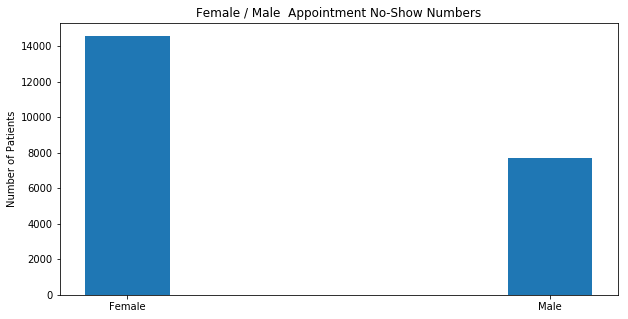

In [13]:
Genders = ['Female' , 'Male']
y_pos = np.arange(len(Genders))
Data_Plot_Genders = [Total_Female , Total_Male]

#Plot the data in a bar chart
plt.figure(figsize=(10 , 5))
plt.bar(y_pos, Data_Plot_Genders , align='center' , width=.2)
plt.xticks(y_pos, Genders)
plt.ylabel('Number of Patients')
plt.title('Female / Male  Appointment No-Show Numbers')
plt.show()

To investigate more, we will split each gender based on recieving SMS or not. The following is a visual representation of the data above regarding gender and recieving SMS or not.

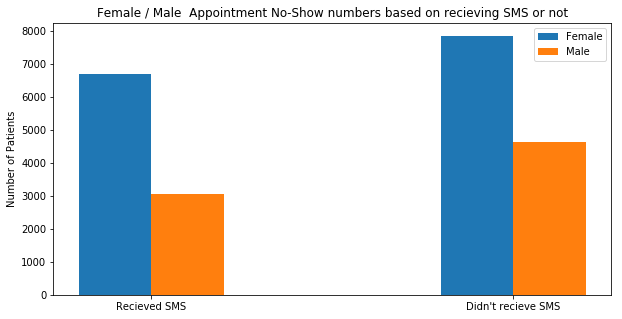

In [14]:
Genders = ['Female' , 'Male']
SMS_state = ['Recieved SMS' , 'Didn\'t recieve SMS']

y_pos = np.arange(len(SMS_state))

female_numbers = [int(data_n_array[1,1]) ,int(data_n_array[1,2])]
male_numbers = [int(data_n_array[2,1]) ,int(data_n_array[2,2])] 

#Plot the data in a bar chart
plt.figure(figsize=(10 , 5))
plt.bar(y_pos, female_numbers , align='edge' , width=-.2)
plt.bar(y_pos, male_numbers , align='edge' , width=.2)
plt.xticks(y_pos, SMS_state)
plt.legend(Genders)
plt.ylabel('Number of Patients')
plt.title('Female / Male  Appointment No-Show numbers based on recieving SMS or not')
plt.show()

It looks that there is not much efect of recieving SMS or not. However, this is not guaranteed and need more investigation to drow a solid concultion about this point. 

##### <a id='q2'></a>
### Question 2: Which day is the day which has the higher probability of a patient not to show in an appointment?

The next code will take the age of the patients who did not show from the data set and plot it based on the day of the appointment.

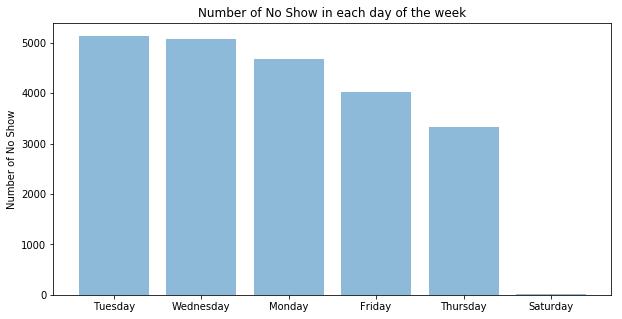

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# Create a new column to store the appointments days names 
MyData['day_of_week'] = MyData['AppointmentDay'].dt.weekday_name

#Convert the data in the dataframe to an aggrigated list
data_days = MyData['day_of_week'].value_counts().tolist()

#Create a list to store the days names
Days_Names = ['Tuesday' , 'Wednesday' , 'Monday' , 'Friday' , 'Thursday', 'Saturday' ]

#Plot the data
y_pos = np.arange(len(Days_Names))
plt.figure(figsize=(10, 5))
plt.bar(y_pos, data_days, align='center', alpha=0.5)
plt.xticks(y_pos, Days_Names)
plt.ylabel('Number of No Show')
plt.title('Number of No Show in each day of the week')
 
plt.show()

##### <a id='q3'></a>
### Question 3: what's the distribution of the patients' age who did not show in appointments?

Age distribution of patients who did not show up on appointments. We will calculating the 5-numbers summary for the age of the patients first.

In [16]:
Min_age = MyData['Age'].min()
Q1_age = MyData['Age'].quantile(0.25)
Median_age = MyData['Age'].quantile(0.50)
Q3_age = MyData['Age'].quantile(0.75)
Max_age = MyData['Age'].max()
SD_age = stat.stdev(MyData['Age'])

In [17]:
print('Youngest patient didn\'t show in appointment is: {}'.format(Min_age))
print('Quartile 1 of the patients age is {}'.format(Q1_age))
print('Quartile 2 (the median) of the patients age is {}'.format(Median_age))
print('Quartile 3 of the patients age is {}'.format(Q3_age))
print('Oldest patient didn\'t show in appointment is: {}'.format(Max_age))
print('The standard deviation of patients\' age who didn\'t show in appointment is: {}'.format(SD_age))

Youngest patient didn't show in appointment is: 0
Quartile 1 of the patients age is 16.0
Quartile 2 (the median) of the patients age is 33.0
Quartile 3 of the patients age is 51.0
Oldest patient didn't show in appointment is: 115
The standard deviation of patients' age who didn't show in appointment is: 21.93171219946131


The youngest patient age 0 is still possible. It can be an infant whos age is in months so it is calculated as 0 year. The oldest patient was at the age of 115 which is possible too.<br>
The quartile 1 means that 25% of the patints who did not show in the appointment age is 16 years or less.<br>
The quartile 2 is the age which half of the patints who did not show in the appointment is less and the other is more.<br>
The quartile 3 means that 75% of the patints who did not show in the appointment age is 51 years or more.<br>

In the next section we will drow a boxplot chart to visualize these numbers.

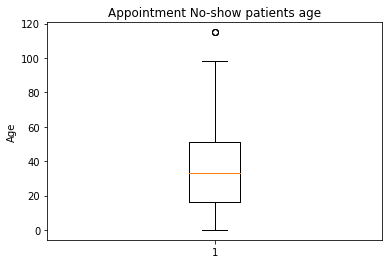

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_title('Appointment No-show patients age')
ax1.boxplot(MyData['Age'].tolist())
ax1.set_ylabel('Age')
plt.show()

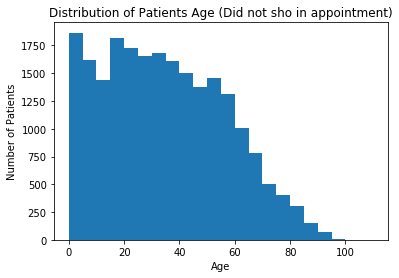

In [33]:
plt.hist(MyData['Age'].tolist(),range(0,115,5))
plt.title('Distribution of Patients Age (Did not sho in appointment)')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

<a id='conclusions'></a>
## Conclusions

From the data investigation above, appearently, there is no clear relationship between not recieving SMS and not showing in the appointment. However, this is not confirmed and with more and deeper investigation it can change.<br>

Not showing on appointment has happened mostly on Tuesday and Wednesday. Monday and Friday were less. Tuesday was significantly less and a little more than half the Not showing on Tuesdays. On Saturday, there are ony couple of no shows. Either this is weekend and patients are free and not possibly missing an appointment, or it's weekend an these are wrong entries.<br>

Overall, the number of patients who did not show in appointments gets less on the higher age groups.

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0